In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from head import opentrons
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

INFO: Using numpy backend


In [3]:
# read data from .xslx that we use as an example
spectra = pd.read_excel('../data/opentrons/spectra.xlsx', index_col=0, engine='openpyxl')
bkg = spectra['Water']
spectra.apply(lambda x: x-bkg, axis=0)
spectra.iloc[:,:8].to_excel('../data/opentrons/random.xlsx')
spectra.iloc[:,8:16].to_excel('../data/opentrons/iteration.xlsx')

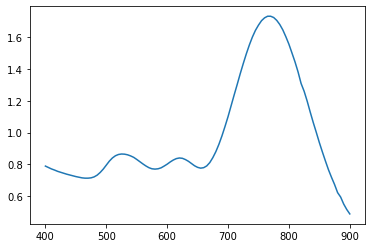

In [4]:
# we create a target spectra here
# in this case we select one from the spectra data frame loaded above
xt = spectra['D4'].index.to_numpy()
yt = spectra['D4'].values
plt.plot(xt, yt)
plt.show()

In [5]:
# set up your design space using the lower and upper limits
CAgNO3 = [-5,5]
CAA = [0.1,3.5]
bounds = [CAgNO3, CAA]

In [6]:
optim = opentrons.Optimizer(xt, yt, bounds, 
                            savedir = '../data/opentrons/', batch_size=8)

INFO: Getting suggestions for iteration 0


In [7]:
# save the object you would get the concentrations as 
# a .npy file that you can load into an array and process for OT2 stocks etc
optim.save()

INFO: Iteriation 0 has an existing directory in ../data/opentrons//0


In [8]:
# there's a random.xlsx file added to the location below 
# in this case it was selected to be a portion of the spectra data frame loaded above
optim.update('../data/opentrons/random.xlsx')

INFO: Current experiment id : 0
INFO: Iteration : 1
INFO: 0	[2.54576445 0.62671705]	[-9.32138062]
INFO: 1	[1.513381   1.95356851]	[-4.68993139]
INFO: 2	[-3.70705888  0.11765985]	[-3.79214025]
INFO: 3	[4.1697675  2.43781533]	[-0.]
INFO: 4	[-3.21963683  3.2852262 ]	[-8.89494896]
INFO: 5	[-1.55525744  2.40077999]	[-2.10845685]
INFO: 6	[2.3272413  1.18846335]	[-2.82251477]
INFO: 7	[-0.44267416  3.22058063]	[-4.75155306]


In [9]:
# save again so that you've a trace after each iteration
# this will save to the same iteration directory but adds model and spectra that we provided in the previous cell
optim.save()

INFO: Iteriation 0 has an existing directory in ../data/opentrons//0


In [10]:
# running the next iteratiorn with BO selection is very similar
# We additionally call the following to get the suggestion and save them into iteration id
optim.suggest_next()
optim.save()

INFO: Getting suggestions for iteration 1
INFO: Iteriation 1 has an existing directory in ../data/opentrons//1


In [11]:
# we now have to go back to the OT2, make the samples and measure them 
# collect the UV-Vis in a xlsx file and update the optimizer
optim.update('../data/opentrons/iteration.xlsx')
optim.save()

INFO: Current experiment id : 8
INFO: Iteration : 2
INFO: 0	[4.31708699 2.2732428 ]	[-9.12730789]
INFO: 1	[-0.20847472  0.35501327]	[-2.00254631]
INFO: 2	[3.94641472 2.34655235]	[-3.9463098]
INFO: 3	[4.96365291 0.1       ]	[-5.01365137]
INFO: 4	[4.37127804 2.56389975]	[-9.64096451]
INFO: 5	[-1.52802257  2.03562138]	[-3.38805938]
INFO: 6	[-1.58218255  2.76977158]	[-5.11135769]
INFO: 7	[4.0350156  2.61578651]	[-5.7354517]
INFO: Iteriation 1 has an existing directory in ../data/opentrons//1


In [12]:
# Repeat the above iteration process until budget expiry.